# Machine Learning

In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import CatBoostEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt


import cv 
import importlib

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier, RUSBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as PipelineIMB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier, RUSBoostClassifier
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import utils

import joblib

from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
from tensorflow.keras import callbacks


c:\Users\emman\miniconda3\envs\DAA\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:18: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
c:\Users\emman\miniconda3\envs\DAA\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pd.set_option("display.max_colwidth", None)

In [3]:
data = pd.read_csv("dados/pos_analyse.csv", encoding='latin1')

In [115]:
data.drop("Unnamed: 0", axis=1, inplace= True)

In [116]:
data.head()

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,...,is_weekend,is_holiday,season,AVERAGE_SPEED_DIFF_N,LUMINOSITY_N,AVERAGE_CLOUDINESS_N,is_peak_hour,poor_visibility,hour_weekday,time_ratio
0,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,...,0,0,Summer,2,2,NaN,1,0,79,0.161064
1,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,...,0,0,Summer,3,2,1.0,1,0,110,0.552632
2,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,...,1,0,Summer,3,2,NaN,1,0,160,0.450704
3,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,...,0,0,Winter,3,2,1.0,1,0,35,0.648247
4,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,...,0,0,Spring,2,2,NaN,1,0,84,0.654545


In [ ]:
data.shape

In [ ]:
data.info()

In [88]:
#data = data.dropna(subset=["AVERAGE_SPEED_DIFF_N"])

data.shape

(6812, 26)

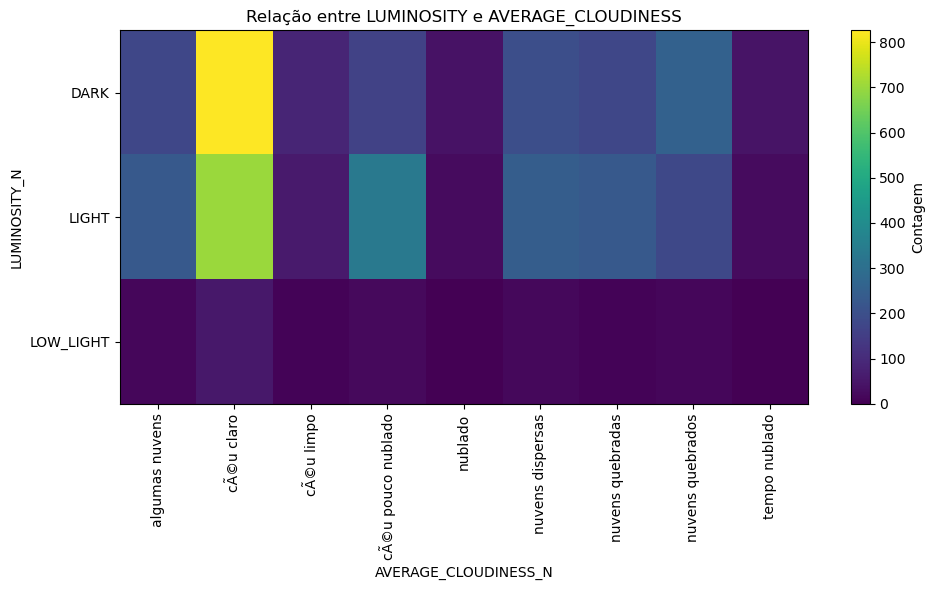

In [100]:
ct = pd.crosstab(data["LUMINOSITY"], data["AVERAGE_CLOUDINESS"])

plt.figure(figsize=(10, 6))
plt.imshow(ct, aspect='auto')
plt.colorbar(label='Contagem')

plt.xticks(range(len(ct.columns)), ct.columns, rotation=90)
plt.yticks(range(len(ct.index)), ct.index)

plt.xlabel("AVERAGE_CLOUDINESS_N")
plt.ylabel("LUMINOSITY_N")
plt.title("Relação entre LUMINOSITY e AVERAGE_CLOUDINESS")

plt.tight_layout()
plt.show()

In [4]:

def preencher_cloudiness(row):
    if pd.notna(row["AVERAGE_CLOUDINESS_N"]):
        return row["AVERAGE_CLOUDINESS_N"]
    
    if row["LUMINOSITY_N"] == 2: # light
        return 1   # céu claro
    
    if row["LUMINOSITY_N"] == 0: # dark
        return 7   # nublado
    
    if row["LUMINOSITY_N"] == 1: #LOW_LIGHT
        return 3 # algumas nuvens

data["AVERAGE_CLOUDINESS_N"] = data.apply(preencher_cloudiness, axis=1)


In [118]:
data.isna().sum()

record_date                   0
AVERAGE_SPEED_DIFF         2200
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
year                          0
month                         0
day                           0
hour                          0
weekday                       0
is_weekend                    0
is_holiday                    0
season                        0
AVERAGE_SPEED_DIFF_N          0
LUMINOSITY_N                  0
AVERAGE_CLOUDINESS_N          0
is_peak_hour                  0
poor_visibility               0
hour_weekday                  0
time_ratio                    0
dtype: int64

In [5]:
data["record_date"] = pd.to_datetime(data["record_date"])

In [6]:
data = data.sort_values(by='record_date')


In [121]:
data.columns

Index(['record_date', 'AVERAGE_SPEED_DIFF', 'AVERAGE_FREE_FLOW_SPEED',
       'AVERAGE_TIME_DIFF', 'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY',
       'AVERAGE_TEMPERATURE', 'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY',
       'AVERAGE_WIND_SPEED', 'AVERAGE_CLOUDINESS', 'year', 'month', 'day',
       'hour', 'weekday', 'is_weekend', 'is_holiday', 'season',
       'AVERAGE_SPEED_DIFF_N', 'LUMINOSITY_N', 'AVERAGE_CLOUDINESS_N',
       'is_peak_hour', 'poor_visibility', 'hour_weekday', 'time_ratio'],
      dtype='object')

### Treino e Teste

In [52]:
X =  data[['record_date','AVERAGE_FREE_FLOW_SPEED',
       'AVERAGE_TIME_DIFF', 'AVERAGE_FREE_FLOW_TIME',
       'AVERAGE_TEMPERATURE', 'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY',
       'AVERAGE_WIND_SPEED', 'year', 'month', 'day',
       'hour', 'weekday', 'is_weekend', 'is_holiday', 'season', 'LUMINOSITY_N', 'AVERAGE_CLOUDINESS_N',
       'is_peak_hour', 'poor_visibility', 'hour_weekday', 'time_ratio']]

y = data['AVERAGE_SPEED_DIFF_N']

#X = X.dropna()
#y = y.loc[X.index]

# Time-Based Split 
# cutoff = data['record_date'].quantile(0.70)  
# train_mask = data['record_date'] <= cutoff

# X_train, X_test = X[train_mask], X[~train_mask]
# y_train, y_test = y[train_mask], y[~train_mask]

# #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = n, stratify=y)

# print(f"Datas do treino: {data[train_mask]['record_date'].min()} a {data[train_mask]['record_date'].max()}")
# print(f"Datas do teste: {data[~train_mask]['record_date'].min()} a {data[~train_mask]['record_date'].max()}")

# Time-Based Split
cutoff = data['record_date'].quantile(0.70)
train_mask = data['record_date'] <= cutoff

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = n, stratify=y)

X_train_full, X_test = X[train_mask], X[~train_mask]
y_train_full, y_test = y[train_mask], y[~train_mask]

cutoff_val = X_train_full['record_date'].quantile(0.80)  
train_mask_inner = X_train_full['record_date'] <= cutoff_val

X_train, X_val = X_train_full[train_mask_inner], X_train_full[~train_mask_inner]
y_train, y_val = y_train_full[train_mask_inner], y_train_full[~train_mask_inner]

#LOOKKK
X_train = X_train.drop(columns='record_date')
X_val = X_val.drop(columns='record_date')
X_test = X_test.drop(columns='record_date')


### Pipeline

In [56]:
'''O CatBoostEncoder substitui valores categóricos por uma versão suavizada da média da variável alvo (target mean encoding), levando em consideração a distribuição da variável alvo para evitar overfitting'''

def f_preprocessor ():
    cols_num = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cols_cat = X.select_dtypes(include=['object', 'category']).columns.tolist()

    pipe_cat = Pipeline([('encoder', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'))]) #Pipeline([('encoder', CatBoostEncoder())])#
    pipe_num = Pipeline([('std_scaler', StandardScaler())])

    preprocessor = ColumnTransformer([('numeric', pipe_num, cols_num), #'passthrough'
                                    ('categoric', pipe_cat, cols_cat)])
    return preprocessor

preprocessor = f_preprocessor()

### Cross Validation (treino)

In [141]:
importlib.reload(cv)
df_over = cv.cross_validation_models_set_class('Default', preprocessor, X_train, y_train)
df_over.sort_values('F1-Score', ascending = False)

,Modelo,ROC-AUC,Accuracy,Precision,Recall,F1-Score,Kappa
8,CatBoost,0.965,0.801,0.788,0.796,0.791,0.735
9,Balanced Random Forest,0.965,0.798,0.787,0.800,0.790,0.732
3,Random Forest,0.964,0.804,0.794,0.785,0.789,0.737
4,Gradient Boosting,0.962,0.804,0.791,0.785,0.788,0.737
11,HistGradientBoosting,0.961,0.791,0.782,0.776,0.778,0.720
6,LightGBM,0.961,0.792,0.782,0.775,0.778,0.721
7,XGBoost,0.960,0.792,0.780,0.773,0.776,0.721
5,Support Vector Machine,0.956,0.770,0.771,0.742,0.750,0.687
12,MLP (Neural Network),0.952,0.770,0.767,0.736,0.745,0.687
0,Regressão Logística,0.955,0.774,0.761,0.730,0.741,0.693


In [ ]:
importlib.reload(cv)
df_over = cv.cross_validation_models_set_class('Oversampling', preprocessor, X_train, y_train)
df_over.sort_values('F1-Score', ascending = False)

### Tuning

In [57]:


n = 42

decision_tree_params = {
    'model__criterion': ['gini', 'entropy'],  
    'model__max_depth': [None, 5, 10, 20], 
    'model__min_samples_split': [2, 5, 10],  
    'model__min_samples_leaf': [1, 2, 4]  
}

random_forest_params = {
    'model__n_estimators': [100, 200],  
    'model__criterion': ['gini', 'entropy'], 
    'model__max_depth': [None, 5, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__bootstrap': [True, False] 
}

balanced_random_forest_params = {
    'model__n_estimators': [100, 200],
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 5, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__bootstrap': [True, False],
    'model__sampling_strategy': ['auto', 0.5, 0.75],  # Controle do balanceamento
    'model__replacement': [True, False],  # Amostragem com/sem reposição
    'model__class_weight': [None, 'balanced', 'balanced_subsample']
}

gradient_boosting_params = {
    'model__learning_rate': [0.1, 0.01],
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 4, 5]
}

logistic_regression_params = {
    'model__C': [0.1, 1, 10],  # regularização
    'model__penalty': ['l1', 'l2'],  # tipo de regularização
    'model__solver': ['liblinear']  
}

# Parâmetros para SVM
svm_params = {
    'model__C': [0.1, 1, 10],  
    'model__kernel': ['linear', 'rbf'],  
    'model__gamma': ['scale', 'auto']  # Coeficiente para kernel 'rbf'
}



knn_params = {
    'model__n_neighbors': [3, 5, 7, 10],  # Número de vizinhos a serem considerados
    'model__weights': ['uniform', 'distance'],  # Peso dado aos vizinhos
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algoritmo usado para encontrar os vizinhos
    'model__leaf_size': [20, 30, 40],  # Tamanho das folhas (afeta a eficiência)
    'model__p': [1, 2]  # Tipo de distância (1 = Manhattan, 2 = Euclidiana)
}


# Parâmetros para LightGBM
lightgbm_params = {
    'model__num_leaves': [31, 50, 100],          # Número máximo de folhas em uma árvore
    'model__max_depth': [-1, 5, 10],             # Profundidade máxima (-1 significa sem limite)
    'model__learning_rate': [0.1, 0.01, 0.001],  # Taxa de aprendizado
    'model__n_estimators': [100, 200],           # Número de árvores
    'model__min_child_samples': [20, 50],        # Número mínimo de dados em uma folha
    'model__subsample': [0.8, 1.0],              # Fração de amostras para treino
    'model__colsample_bytree': [0.8, 1.0],       # Fração de features para construir cada árvore
    'model__reg_alpha': [0, 0.1],                # Regularização L1
    'model__reg_lambda': [0, 0.1],               # Regularização L2
    'model__boosting_type': ['gbdt', 'dart']      # Tipo de boosting
}

xgb_params = {
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.1, 0.01, 0.001],
    'model__n_estimators': [100, 200],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0],
    'model__gamma': [0, 0.1, 0.2],
    'model__reg_alpha': [0, 0.1],
    'model__reg_lambda': [1, 0.1],
    'model__min_child_weight': [1, 5],
    'model__tree_method': ['hist']  # Faster for medium-sized datasets
}

catboost_params = {
    'model__depth': [8, 10, 12],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__iterations': [100, 200],
    'model__l2_leaf_reg': [3, 5, 7],
    'model__border_count': [64, 96],
    'model__grow_policy': ['SymmetricTree'],  
    'model__auto_class_weights': ['Balanced'], 
    'model__boosting_type': ['Ordered']
}

mlp_params = {
    'model__hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100)],
    'model__activation': ['relu', 'tanh'],  # 'logistic' também é possível
    'model__solver': ['adam'],  
    'model__alpha': [0.0001, 0.001, 0.01],  # Regularização L2
    'model__learning_rate_init': [0.001, 0.01],  # Taxa de aprendizado inicial
    'model__max_iter': [200, 300],
    'model__early_stopping': [True],  # Para evitar overfitting
    'model__random_state': [42]  # Para reprodutibilidade
}

easy_ensemble_params = {
    'model__n_estimators': [10, 30, 50, 100],
    'model__estimator': [DecisionTreeClassifier(max_depth=5)],  # Removed None
    'model__warm_start': [True, False],
    'model__sampling_strategy': ['auto', 0.5, 0.75, 1.0],
    'model__replacement': [True, False],
    'model__random_state': [None, 42],
    'model__estimator__criterion': ['gini', 'entropy'],
    'model__estimator__max_depth': [None, 5, 10],
    'model__estimator__min_samples_split': [2, 5, 10],
    'model__estimator__min_samples_leaf': [1, 2, 4]
}




modelos = {
    #'Gradient Boosting': (GradientBoostingClassifier(random_state=n), gradient_boosting_params),
    #'Regressão Logística': (LogisticRegression(random_state=n, max_iter=1000), logistic_regression_params),
    #'SVM': (SVC(random_state=n, probability=True), svm_params),
    # 'KNN': (KNeighborsClassifier(), knn_params),
    #'MLP' : (MLPClassifier(),mlp_params),
    #'XGBoost': (XGBClassifier(random_state=n), xgb_params),
    #'LightGBM': (LGBMClassifier(random_state=n), lightgbm_params)
    #'Decision Tree': (DecisionTreeClassifier(random_state=n), decision_tree_params)
    'Random Forest': (RandomForestClassifier(random_state=n), random_forest_params),
    'CatBoost': (CatBoostClassifier(random_state=n, verbose=0, auto_class_weights='Balanced'), catboost_params),
    #'Balanced Random Forest': (BalancedRandomForestClassifier(random_state=n), balanced_random_forest_params),
    #'Easy Ensemble': (EasyEnsembleClassifier(random_state=42), easy_ensemble_params)

}


In [35]:
importlib.reload(cv)
gs = cv.hyperparameter_optimization(None,preprocessor, X_train, y_train, modelos)

In [36]:
gs

,model,F1_macro,Recall_macro,Precision_macro,Best_params
0,Random Forest,0.765555,0.756494,0.781391,"{'model__bootstrap': True, 'model__criterion': 'gini', 'model__max_depth': 20, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 200}"
1,CatBoost,0.782025,0.784064,0.784760,"{'model__auto_class_weights': 'Balanced', 'model__boosting_type': 'Ordered', 'model__border_count': 64, 'model__depth': 10, 'model__grow_policy': 'SymmetricTree', 'model__iterations': 100, 'model__l2_leaf_reg': 5, 'model__learning_rate': 0.2}"


In [ ]:
importlib.reload(cv)
gs = cv.hyperparameter_optimization(SMOTE(),preprocessor, X_train, y_train, modelos)

In [ ]:
gs

### Teste

0:	learn: 1.5904348	test: 1.5932492	best: 1.5932492 (0)	total: 9.68ms	remaining: 19.3s
1:	learn: 1.5770990	test: 1.5797575	best: 1.5797575 (1)	total: 18.3ms	remaining: 18.3s
2:	learn: 1.5586444	test: 1.5636612	best: 1.5636612 (2)	total: 26.8ms	remaining: 17.8s
3:	learn: 1.5413382	test: 1.5480164	best: 1.5480164 (3)	total: 34.3ms	remaining: 17.1s
4:	learn: 1.5236419	test: 1.5308906	best: 1.5308906 (4)	total: 42.3ms	remaining: 16.9s
5:	learn: 1.5067518	test: 1.5149217	best: 1.5149217 (5)	total: 50ms	remaining: 16.6s
6:	learn: 1.4924231	test: 1.5019770	best: 1.5019770 (6)	total: 56.8ms	remaining: 16.2s
7:	learn: 1.4758468	test: 1.4873889	best: 1.4873889 (7)	total: 63.8ms	remaining: 15.9s
8:	learn: 1.4610587	test: 1.4725509	best: 1.4725509 (8)	total: 72ms	remaining: 15.9s
9:	learn: 1.4466122	test: 1.4601627	best: 1.4601627 (9)	total: 79.1ms	remaining: 15.7s
10:	learn: 1.4341177	test: 1.4489451	best: 1.4489451 (10)	total: 86.4ms	remaining: 15.6s
11:	learn: 1.4222560	test: 1.4395818	best: 1.

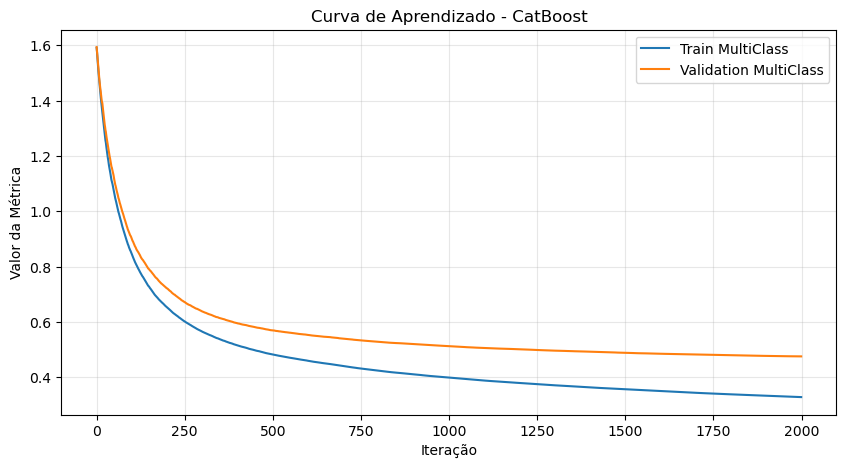

In [75]:
n = 42

#{'model__auto_class_weights': 'Balanced', 'model__boosting_type': 'Ordered', 'model__border_count': 64, 'model__depth': 10, 'model__grow_policy': 'SymmetricTree', 'model__iterations': 100, 'model__l2_leaf_reg': 5, 'model__learning_rate': 0.2}

catboost = CatBoostClassifier(
    auto_class_weights='Balanced',
    depth=8,  # ↓ Reduzido de 10 para 6-8
    learning_rate=0.02,  # ↓ Reduzido de 0.2 para 0.05-0.1
    iterations=2000,
    border_count=32,
    min_data_in_leaf=200,
    boosting_type='Plain',
    grow_policy='SymmetricTree',
    l2_leaf_reg=150,  # ↑ Aumentado de 50 para 100-200
    od_type='Iter',
    od_wait=100,  # ↑ Mais paciência
    verbose=True,
    rsm=0.9,  # ↑ Mais features por split
    bootstrap_type='Bayesian',  # ← Mudado para Bayesian
    random_strength=0.5,  # ↑ Mais ruído
    use_best_model=True,
    eval_metric='MultiClass'  # ← Especificar métrica
)

# catboost = CatBoostClassifier(
#     auto_class_weights='Balanced',
#     depth=6,  # ↓ Reduzido de 10 para 6-8
#     learning_rate=0.05,  # ↓ Reduzido de 0.2 para 0.05-0.1
#     iterations=2000,
#     border_count=32,
#     boosting_type='Plain',
#     grow_policy='SymmetricTree',
#     l2_leaf_reg=100,  # ↑ Aumentado de 50 para 100-200
#     od_type='Iter',
#     od_wait=100,  # ↑ Mais paciência
#     random_state=n,
#     verbose=True,
#     min_data_in_leaf=100,  # ↑ Aumentado de 50 para 100-200
#     rsm=0.8,  # ↑ Mais features por split
#     bootstrap_type='Bayesian',  # ← Mudado para Bayesian
#     random_strength=10.0,  # ↑ Mais ruído
#     use_best_model=True,
#     eval_metric='MultiClass'  # ← Especificar métrica
# )

pipe_cb = PipelineIMB([
    ('preprocessor', preprocessor),
    ('resampler', SMOTE()),
    ('model', catboost)
])

#{'model__bootstrap': True, 'model__criterion': 'gini', 'model__max_depth': 20, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 200}
randomforest = RandomForestClassifier(bootstrap = True, criterion = 'gini', max_depth =20, min_samples_leaf =2, min_samples_split= 2, n_estimators= 200)
pipe_rf = PipelineIMB([
    ('preprocessor', preprocessor),
    ('model', randomforest)
])

balancedrandomforest= BalancedRandomForestClassifier(class_weight = None, criterion= 'gini', max_depth =10, min_samples_leaf = 2, min_samples_split= 2, n_estimators =100, replacement =True, sampling_strategy='auto',
                                                     bootstrap=True, oob_score=True)
pipe_brf =PipelineIMB([
    ('preprocessor', preprocessor),
    ('resampler', SMOTE()),
    ('model', balancedrandomforest)
])

#### Treinos
X_val_transformed = preprocessor.transform(X_val)
pipe_cb.fit(X_train, y_train,
             model__eval_set=[(X_val_transformed, y_val)])
#pipe_rf.fit(X_train, y_train)
#pipe_brf.fit(X_train, y_train)

trained = pipe_cb.named_steps['model']

history = trained.evals_result_

plt.figure(figsize=(10,5))

for key in history['learn']:
    plt.plot(history['learn'][key], label=f'Train {key}')
    
for key in history['validation']:
    plt.plot(history['validation'][key], label=f'Validation {key}')

plt.xlabel('Iteração')
plt.ylabel('Valor da Métrica')
plt.title('Curva de Aprendizado - CatBoost')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#print(f"OOB Score: {pipe_rf.named_steps['model'].oob_score_:.4f}")
 


##### Rede

Treinando Rede Neural com Early Stopping...
Epoch 1/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5621 - loss: 1.4819 - val_accuracy: 0.5922 - val_loss: 1.3116 - learning_rate: 0.0010
Epoch 2/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6691 - loss: 1.1826 - val_accuracy: 0.7096 - val_loss: 0.9907 - learning_rate: 0.0010
Epoch 3/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7069 - loss: 1.0767 - val_accuracy: 0.6950 - val_loss: 0.8914 - learning_rate: 0.0010
Epoch 4/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7150 - loss: 1.0209 - val_accuracy: 0.7180 - val_loss: 0.8408 - learning_rate: 0.0010
Epoch 5/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7378 - loss: 0.9620 - val_accuracy: 0.7390 - val_loss: 0.8021 - learning_rate: 0.0010
Epoch 6/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7336 - loss: 0.9652 - val_accuracy: 0.7757 - val_loss: 0.7494 - learning_rate: 0.0010
Epoch 7/200
120/120 ━━━━━━━━━━━━━━━━━━

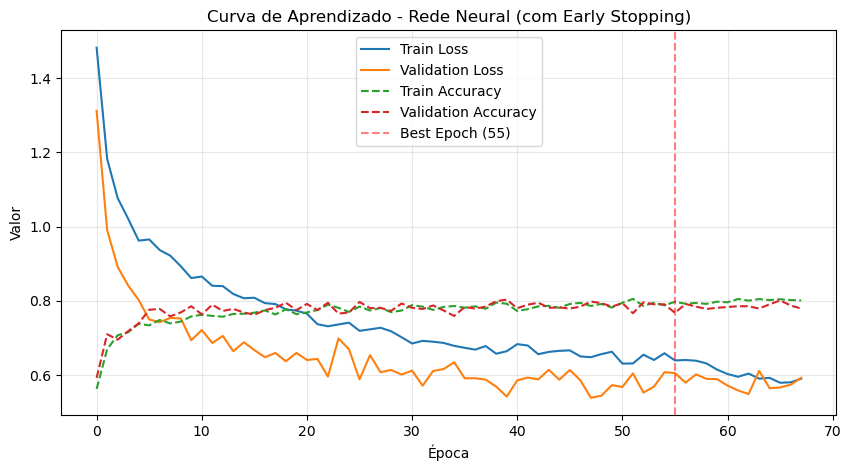


Early stopping at epoch 67
Best epoch: 55
Best val_loss: 0.5385


In [26]:

preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

input_dim = X_train_processed.shape[1]
n_classes = len(np.unique(y_train))

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# class_weights_ = compute_class_weight(
#     class_weight='balanced',
#     classes=np.unique(y_train),
#     y=y_train
# )
# class_weights = dict(enumerate(class_weights_))
# print("Class weights:", class_weights)

class_weights = {
    0: 0.8,   # ↑ de 0.54 (menos punição)
    1: 1.2,   # ↑ de 1.03 (mais foco)
    2: 1.0,   # ↓ de 0.83 (menos foco)
    3: 1.5,   # ~ igual a 1.50
    4: 2.5    # ↓ de 3.14 (menos foco agressivo)
}



nn_model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # MAIS NEURÔNIOS, MENOS REG
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(32, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

nn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy' if n_classes > 2 else 'binary_crossentropy',
    metrics=['accuracy']
)

def train_and_plot_nn_with_early_stop(X_train, y_train, X_val, y_val, model, 
                                     epochs=200, batch_size=32, patience=15):

    # Preparar labels
    if len(np.unique(y_train)) > 2:
        y_train_nn = keras.utils.to_categorical(y_train)
        y_val_nn = keras.utils.to_categorical(y_val)
    else:
        y_train_nn = y_train.reshape(-1, 1)
        y_val_nn = y_val.reshape(-1, 1)
    
    # Callbacks
    early_stopping = callbacks.EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True,
        verbose=1
    )
    
    # Reduce learning rate on plateau
    reduce_lr = callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10,
        min_lr=1e-7,
        verbose=1
    )
    
    history = model.fit(
        X_train, y_train_nn,
        validation_data=(X_val, y_val_nn),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping, reduce_lr],
        class_weight=class_weights, 
        verbose=1
    )
    
    plt.figure(figsize=(10,5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    
    if 'accuracy' in history.history:
        plt.plot(history.history['accuracy'], label='Train Accuracy', linestyle='--')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
    
    if early_stopping.stopped_epoch > 0:
        best_epoch = early_stopping.stopped_epoch - patience
        plt.axvline(x=best_epoch, color='r', linestyle='--', alpha=0.5, label=f'Best Epoch ({best_epoch})')
    
    plt.xlabel('Época')
    plt.ylabel('Valor')
    plt.title('Curva de Aprendizado - Rede Neural (com Early Stopping)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    if early_stopping.stopped_epoch > 0:
        print(f"\nEarly stopping at epoch {early_stopping.stopped_epoch}")
        print(f"Best epoch: {early_stopping.stopped_epoch - patience}")
        print(f"Best val_loss: {min(history.history['val_loss']):.4f}")
    
    return model, history

print("Treinando Rede Neural com Early Stopping...")
trained_nn, history_nn = train_and_plot_nn_with_early_stop(
    X_train_processed, y_train,
    X_val_processed, y_val,
    nn_model,
    epochs=200,
    batch_size=32,
    patience=12
)

In [76]:
# predictions_rf = pipe_rf.predict(X_test)
# predictions_p_rf =  pipe_rf.predict_proba(X_test)[:, 1] 

predictions_cb = pipe_cb.predict(X_test)
predictions_p_cb =  pipe_cb.predict_proba(X_test)[:, 1]

# predictions_nn_p = trained_nn.predict(X_test_processed)
# predictions_nn= predictions_nn_p.argmax(axis=1)



In [78]:
rf_report = classification_report(y_test, predictions_cb)
print("Relatório de Classificação RF:")
print(rf_report)

Relatório de Classificação RF:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       514
           1       0.62      0.83      0.71       475
           2       0.81      0.63      0.71       529
           3       0.74      0.79      0.76       379
           4       0.76      0.71      0.73       147

    accuracy                           0.75      2044
   macro avg       0.76      0.75      0.75      2044
weighted avg       0.77      0.75      0.75      2044



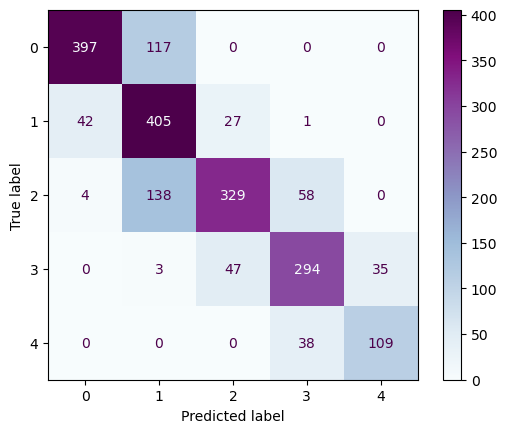

In [62]:
classes = np.unique(y_train)
cm = confusion_matrix(y_test, predictions_cb, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = classes)
disp = disp.plot(cmap = plt.cm.BuPu)
plt.grid(False)

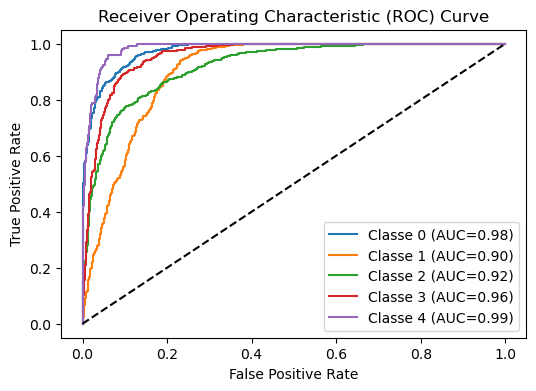

In [63]:
cv.curva_roc(X_test, y_test, pipe_cb)

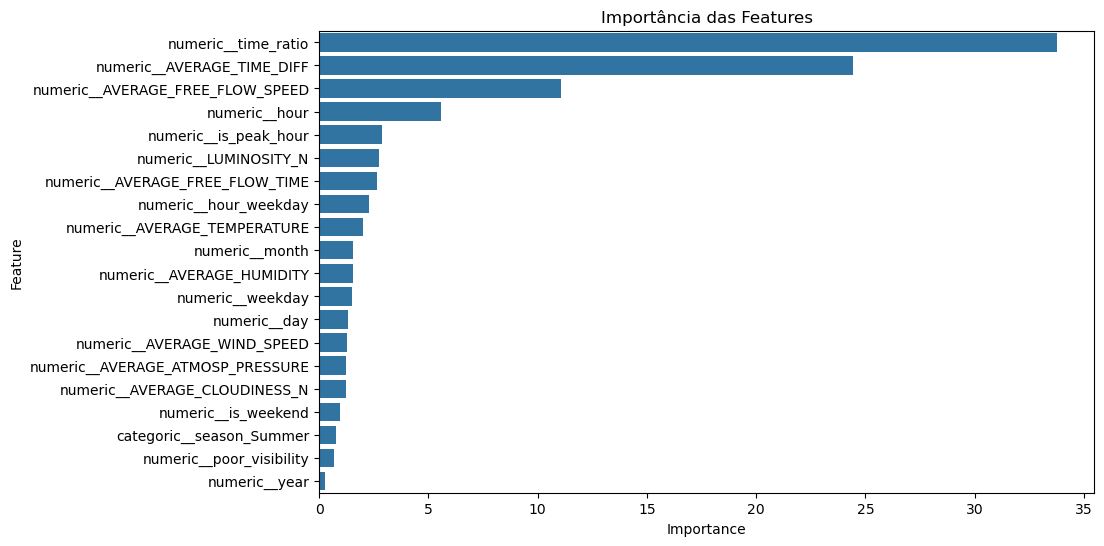

In [64]:
importlib.reload(utils)
#utils.shap_tree(preprocessor, X, X_test, pipe_cb)
utils.feature_importance(pipe_cb)

In [45]:
rf_report = classification_report(y_test, predictions_rf)
print("Relatório de Classificação CB:")
print(rf_report)

Relatório de Classificação CB:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       514
           1       0.62      0.77      0.69       475
           2       0.76      0.67      0.71       529
           3       0.73      0.75      0.74       379
           4       0.80      0.69      0.74       147

    accuracy                           0.74      2044
   macro avg       0.75      0.73      0.74      2044
weighted avg       0.75      0.74      0.74      2044



In [ ]:
cm = confusion_matrix(y_test, predictions_cb, labels=pipe_cb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = pipe_cb.classes_)
disp = disp.plot(cmap = plt.cm.BuPu)
plt.grid(False)

In [ ]:
cv.curva_roc(X_test, y_test, pipe_cb)

In [ ]:
importlib.reload(utils)
#utils.shap_tree(preprocessor, X, X_test, pipe_cb)
utils.feature_importance(pipe_cb)

### Salvar Modelos

In [79]:
pipeline_final = PipelineIMB([('preprocessor', preprocessor), 
                              ('resampler', SMOTE()),
                              ('model', catboost)])
joblib.dump(pipeline_final, 'modelos/catboost_f.pkl')

['modelos/catboost_f.pkl']

In [33]:
pipeline_final = PipelineIMB([('preprocessor', preprocessor), 
                              ('model', catboost)])
joblib.dump(pipeline_final, 'modelos/catboost_c4.pkl')

['modelos/catboost_c4.pkl']

In [29]:
pipeline_nn = PipelineIMB([
    ('preprocessor', preprocessor), 
    ('model', trained_nn)  
])

joblib.dump(pipeline_nn, 'modelos/rede_neural_c4.pkl')

['modelos/rede_neural_c4.pkl']